
## Imports

Avans de commencer, importons les librairies nécessaires à notre préprocessing.

In [9]:
# En premier, faisont les import dont je vais avoir besoin.
import pandas as pd
from pprint import pp
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
pd.__version__

'2.2.2'

In [38]:
testtruc = pd.read_pickle("./data/2022/merged_data-2022.pkl")
testtruc.corr()

Num_Acc     place      catu      grav      sexe       age    trajet  \
Num_Acc  1.000000  0.006571  0.006259  0.006083  0.003041  0.002236  0.003592   
place    0.006571  1.000000  0.893633  0.207327  0.163224 -0.025446  0.057901   
catu     0.006259  0.893633  1.000000  0.219605  0.213817 -0.052663  0.072838   
grav     0.006083  0.207327  0.219605  1.000000  0.169673 -0.027370  0.026763   
sexe     0.003041  0.163224  0.213817  0.169673  1.000000  0.190849  0.130266   
age      0.002236 -0.025446 -0.052663 -0.027370  0.190849  1.000000  0.087189   
trajet   0.003592  0.057901  0.072838  0.026763  0.130266  0.087189  1.000000   
secu1   -0.005932 -0.108595 -0.108120  0.093588  0.033244 -0.026537  0.012665   
secu2   -0.011514 -0.145251 -0.146193  0.116292 -0.012586 -0.006869  0.012426   
secu3   -0.001828 -0.032294 -0.035542  0.032830 -0.024307  0.011546  0.015616   
locp     0.000362  0.718420  0.638257  0.171619  0.120681  0.092744  0.080236   
actp     0.001129  0.718174  0.639020  0.165260  0.110090  0.082026  0.079711   
etatp    0.002600  0.841761  0.752339  0.200643  0.111946  0.051103  0.016771   
senc     0.009559  0.002554  0.001296  0.000350  0.014303  0.009744  0.022062   
catv    -0.000386 -0.041147 -0.061674  0.181303 -0.072493 -0.031820 -0.002101   
obs      0.005544 -0.017570  0.009247  0.106093  0.006934 -0.041907  0.066006   
obsm    -0.008047 -0.142150 -0.141023 -0.122186 -0.009261  0.020397 -0.053178   
choc     0.002058 -0.068744 -0.053382 -0.024336  0.047700  0.032104  0.026520   
manv     0.008310  0.000439 -0.001378 -0.067197  0.003347  0.009845  0.005690   
motor    0.002217 -0.045529 -0.071901  0.162249  0.033778  0.047724  0.054906   
catr    -0.003444  0.067006  0.045238  0.010519 -0.013953  0.003797 -0.007091   
circ    -0.000826 -0.026590 -0.018674 -0.002419  0.009671 -0.008816  0.027270   
nbv      0.003869 -0.073219 -0.056145 -0.015289 -0.018138 -0.032985  0.003715   
vosp     0.008531  0.020425  0.008824 -0.002605 -0.015857 -0.014895 -0.032588   
prof    -0.006701 -0.015205 -0.008505  0.013507  0.005492  0.009882  0.030217   
plan     0.001916 -0.032115 -0.020573  0.037050  0.004739 -0.001403  0.038887   
larrout  0.000751  0.015385  0.012803 -0.022349  0.012057  0.025437  0.039963   
surf    -0.004799 -0.001469  0.004221  0.019844  0.010066 -0.012133  0.001388   
infra   -0.002642  0.041710  0.037720 -0.010340  0.010021  0.017190 -0.006621   
situ     0.004760  0.061786  0.053933  0.037640 -0.008538 -0.011303  0.046890   
vma     -0.000893 -0.088454 -0.071833  0.025089 -0.002327 -0.004387 -0.050109   
jour    -0.025861 -0.001045  0.000201  0.002827 -0.000925 -0.000205  0.009114   
mois    -0.116490  0.004688  0.005033 -0.001373  0.009922  0.000859 -0.005537   
hrmn    -0.004294  0.001371 -0.000102 -0.017618  0.010642 -0.008086  0.011316   
lum      0.006388  0.004644  0.030201  0.020216 -0.070128 -0.152774  0.022378   
dep     -0.002211 -0.000145 -0.004831 -0.000548 -0.039662 -0.049025 -0.040733   
com     -0.002415 -0.000334 -0.005592 -0.000143 -0.040643 -0.047983 -0.038201   
agg     -0.001332  0.095584  0.064585 -0.014339 -0.028203 -0.010801 -0.050684   
int     -0.006585 -0.004070 -0.010789 -0.015321 -0.006025  0.024766  0.000024   
atm      0.004788  0.023312  0.018807  0.000537  0.016605  0.020665 -0.005493   
col     -0.001089  0.282695  0.253940  0.058247  0.008317  0.011216  0.042924   

            secu1     secu2     secu3  ...      jour      mois      hrmn  \
Num_Acc -0.005932 -0.011514 -0.001828  ... -0.025861 -0.116490 -0.004294   
place   -0.108595 -0.145251 -0.032294  ... -0.001045  0.004688  0.001371   
catu    -0.108120 -0.146193 -0.035542  ...  0.000201  0.005033 -0.000102   
grav     0.093588  0.116292  0.032830  ...  0.002827 -0.001373 -0.017618   
sexe     0.033244 -0.012586 -0.024307  ... -0.000925  0.009922  0.010642   
age     -0.026537 -0.006869  0.011546  ... -0.000205  0.000859 -0.008086   
trajet   0.012665  0.012426  0.015616  ...  0.009114 -0.005537  0.011316   

In [39]:
testtruc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126662 entries, 0 to 126661
Data columns (total 41 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  126662 non-null  int64
 1   place    126662 non-null  int8 
 2   catu     126662 non-null  int8 
 3   grav     126662 non-null  int8 
 4   sexe     126662 non-null  int8 
 5   age      126662 non-null  int8 
 6   trajet   126662 non-null  int8 
 7   secu1    126662 non-null  int8 
 8   secu2    126662 non-null  int8 
 9   secu3    126662 non-null  int8 
 10  locp     126662 non-null  int8 
 11  actp     126662 non-null  int8 
 12  etatp    126662 non-null  int8 
 13  senc     126662 non-null  int8 
 14  catv     126662 non-null  int8 
 15  obs      126662 non-null  int8 
 16  obsm     126662 non-null  int8 
 17  choc     126662 non-null  int8 
 18  manv     126662 non-null  int8 
 19  motor    126662 non-null  int8 
 20  catr     126662 non-null  int8 
 21  circ     126662 non-null  int8 
 

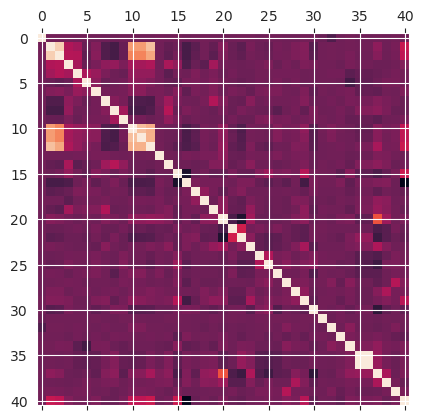

In [40]:
import matplotlib.pyplot as plt

plt.matshow(testtruc.corr())
plt.show()


<Figure size 640x480 with 0 Axes>

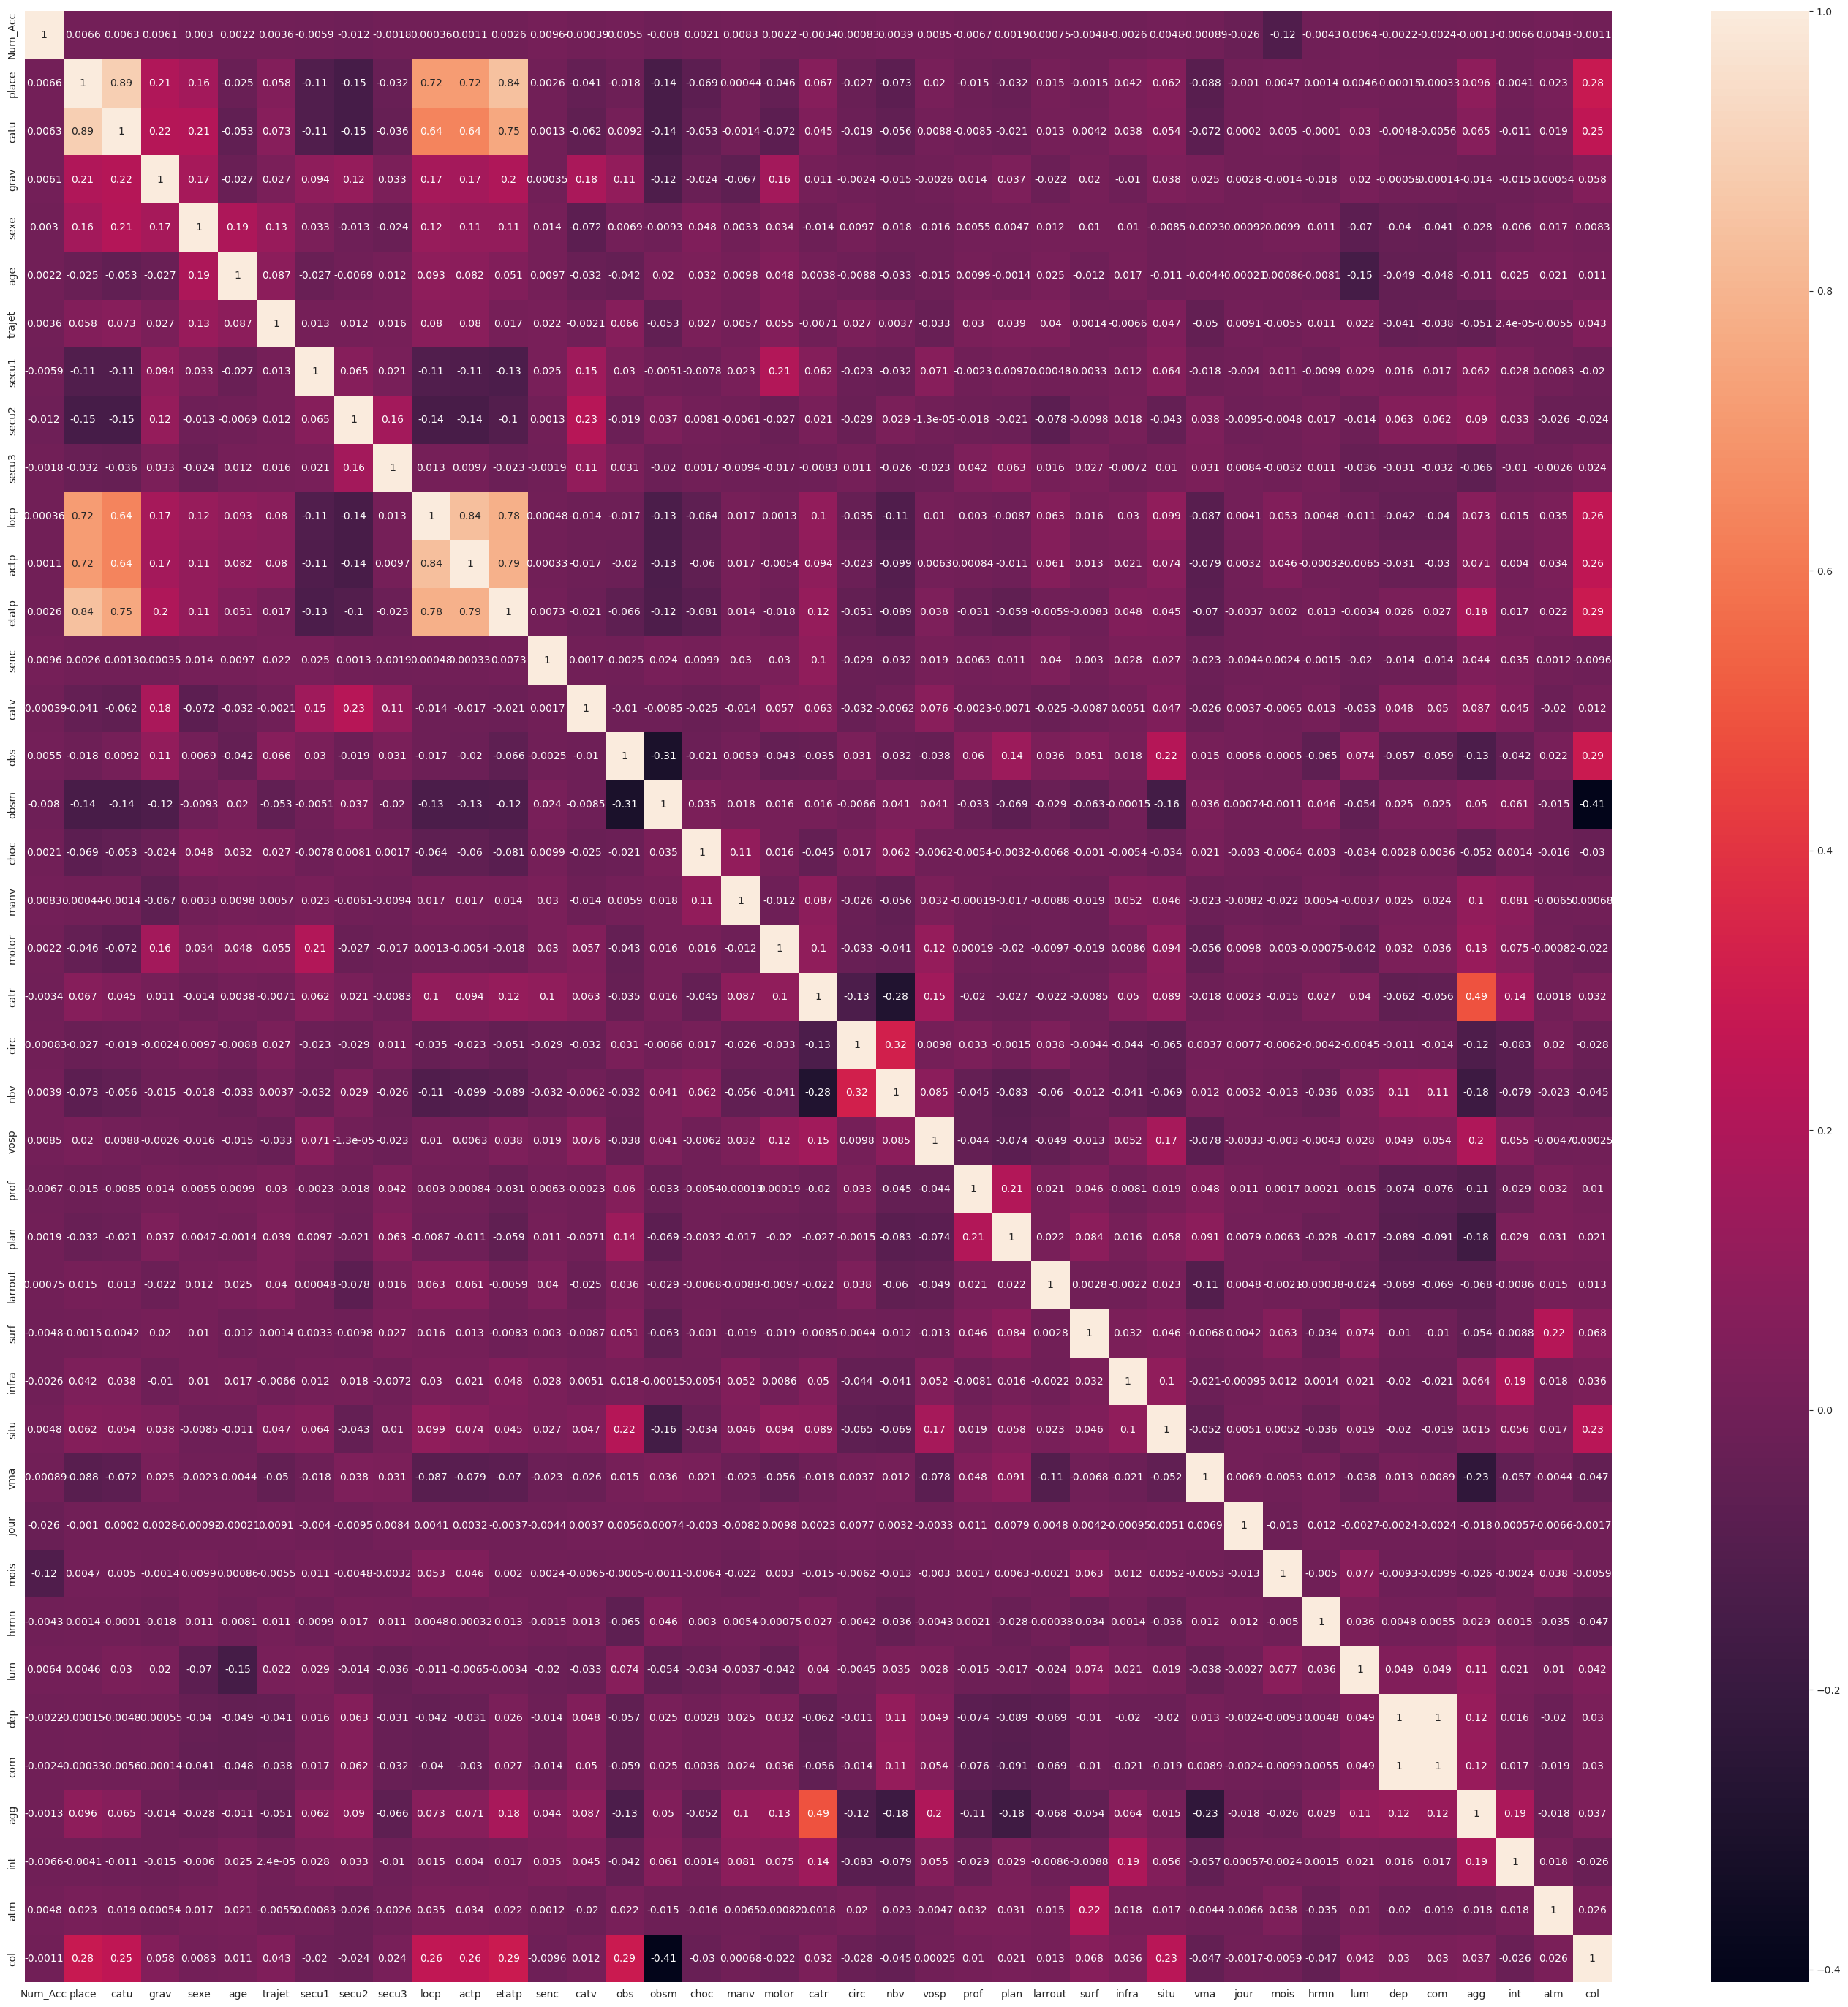

In [42]:
import seaborn as sns

fig = plt.gcf()
plt.figure(figsize=(35,35))
sns.heatmap(testtruc.corr(), annot=True)


plt.show()

In [43]:
import numpy as np

moyenne = np.mean(testtruc,axis=0)
variance = np.var(testtruc, axis=0)
covariance = np.cov(testtruc.T, rowvar=True, ddof=0)
print(f"moyenne = {moyenne}")
print(f"variance = {variance}")
print(f"covariance = \n{covariance}")

moyenne = Num_Acc    2.022000e+11
place      2.089277e+00
catu       1.330067e+00
grav       2.512143e+00
sexe       1.265549e+00
age        3.766945e+01
trajet     3.174749e+00
secu1      1.847586e+00
secu2      8.446653e-01
secu3     -9.163522e-01
locp      -1.588006e-01
actp      -1.162227e-01
etatp     -8.298148e-01
senc       1.572674e+00
catv       1.286971e+01
obs        1.134081e+00
obsm       1.578113e+00
choc       2.842597e+00
manv       6.868248e+00
motor      1.268163e+00
catr       3.287955e+00
circ       1.827707e+00
nbv        2.443993e+00
vosp       2.261531e-01
prof       1.227700e+00
plan       1.287126e+00
larrout    3.287963e+01
surf       1.231490e+00
infra      7.778497e-01
situ       1.526725e+00
vma        5.253011e+01
jour       1.559874e+01
mois       6.600764e+00
hrmn       6.925655e+01
lum        1.924902e+00
dep        5.974777e+01
com        7.003970e+03
agg        1.612228e+00
int        2.047378e+00
atm        1.577032e+00
col        3.750288e+00
dtype:

In [44]:
corr = np.corrcoef(testtruc, rowvar=False)
corr

array([[ 1.        ,  0.00657075,  0.00625853, ..., -0.00658472,
         0.00478793, -0.00108865],
       [ 0.00657075,  1.        ,  0.89363332, ..., -0.00406999,
         0.02331224,  0.28269522],
       [ 0.00625853,  0.89363332,  1.        , ..., -0.01078911,
         0.01880677,  0.25393976],
       ...,
       [-0.00658472, -0.00406999, -0.01078911, ...,  1.        ,
         0.01785439, -0.02575989],
       [ 0.00478793,  0.02331224,  0.01880677, ...,  0.01785439,
         1.        ,  0.02568568],
       [-0.00108865,  0.28269522,  0.25393976, ..., -0.02575989,
         0.02568568,  1.        ]])

In [45]:
def calcul_distance(x1,x2):
    #x1 contient n1 échantillons et D dimensions, x2 contient n2 échantillons et D dimensions
    d = np.square(x1-x2).sum()
    return d


In [47]:
ecartType = np.std(testtruc,axis=0)




def inertie(data, average):
    N = data.shape[0]
    res = calcul_distance(data,average).sum()/N
        
    return res

Y = (testtruc - moyenne)/ecartType

moyenneY = np.mean(Y,axis=0)
c = inertie(Y,moyenneY)

print(c)

40.99999999998723


In [60]:
vpC,vecpC = np.linalg.eigh(covariance)
vpR,vecpR = np.linalg.eigh(corr)


print(vpR)
print(vpC.sum())

print(vpC/vpC.sum())

[2.18870786e-03 8.58104140e-02 1.59353832e-01 1.62898598e-01
 4.00303126e-01 4.41975198e-01 5.26251667e-01 5.65383460e-01
 5.97496530e-01 6.42750810e-01 7.03928334e-01 7.08127063e-01
 7.29683808e-01 7.65263928e-01 7.76543763e-01 7.89552418e-01
 8.09849213e-01 8.45664977e-01 8.65331287e-01 8.77790677e-01
 8.81705455e-01 8.91300502e-01 9.30384250e-01 9.71109035e-01
 9.86848425e-01 9.99257204e-01 1.02642325e+00 1.05405238e+00
 1.08940050e+00 1.10653835e+00 1.11715392e+00 1.14228014e+00
 1.18452670e+00 1.26634073e+00 1.35376759e+00 1.36502772e+00
 1.50855710e+00 1.87008299e+00 2.05298034e+00 2.30439963e+00
 4.44171599e+00]
266195490.9973898
[2.49194015e-10 2.56823817e-10 5.22151174e-10 9.49971394e-10
 9.66640450e-10 1.07535632e-09 1.51996589e-09 1.66332261e-09
 2.22928507e-09 2.43282555e-09 2.52374903e-09 2.79204519e-09
 3.15555218e-09 3.70782085e-09 4.01156319e-09 4.86257375e-09
 6.33555279e-09 7.02127214e-09 7.95156777e-09 8.35558976e-09
 1.03233375e-08 1.09195374e-08 1.25357154e-08 1.48

In [82]:
from sklearn.decomposition import PCA
print(testtruc)
pca = PCA(n_components=2, svd_solver='full')
x_train = pca.fit_transform(testtruc, testtruc["grav"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.get_feature_names_out())
print(pca.score(testtruc))

             Num_Acc  place  catu  grav  sexe  age  trajet  secu1  secu2  \
0       202200000001      1     1     3     1   14       5      2      8   
1       202200000001      1     1     1     1   74       5      1      8   
2       202200000002      1     1     4     1   34       9      1      0   
3       202200000002      1     1     1     1   52       4      1      0   
4       202200000003      1     1     1     1   20       0      1      0   
...              ...    ...   ...   ...   ...  ...     ...    ...    ...   
126657  202200055301      1     1     1     2   20       5      1     -1   
126658  202200055301      8     2     3     2   18       5      1     -1   
126659  202200055301      1     1     4     2   69       5      1     -1   
126660  202200055302      1     1     3     1   30       1      2      6   
126661  202200055302      1     1     1     1   22      -1      1     -1   

        secu3  ...  jour  mois  hrmn  lum  dep   com  agg  int  atm  col  
0          -

Text(0, 0.5, 'Second Principal Component')

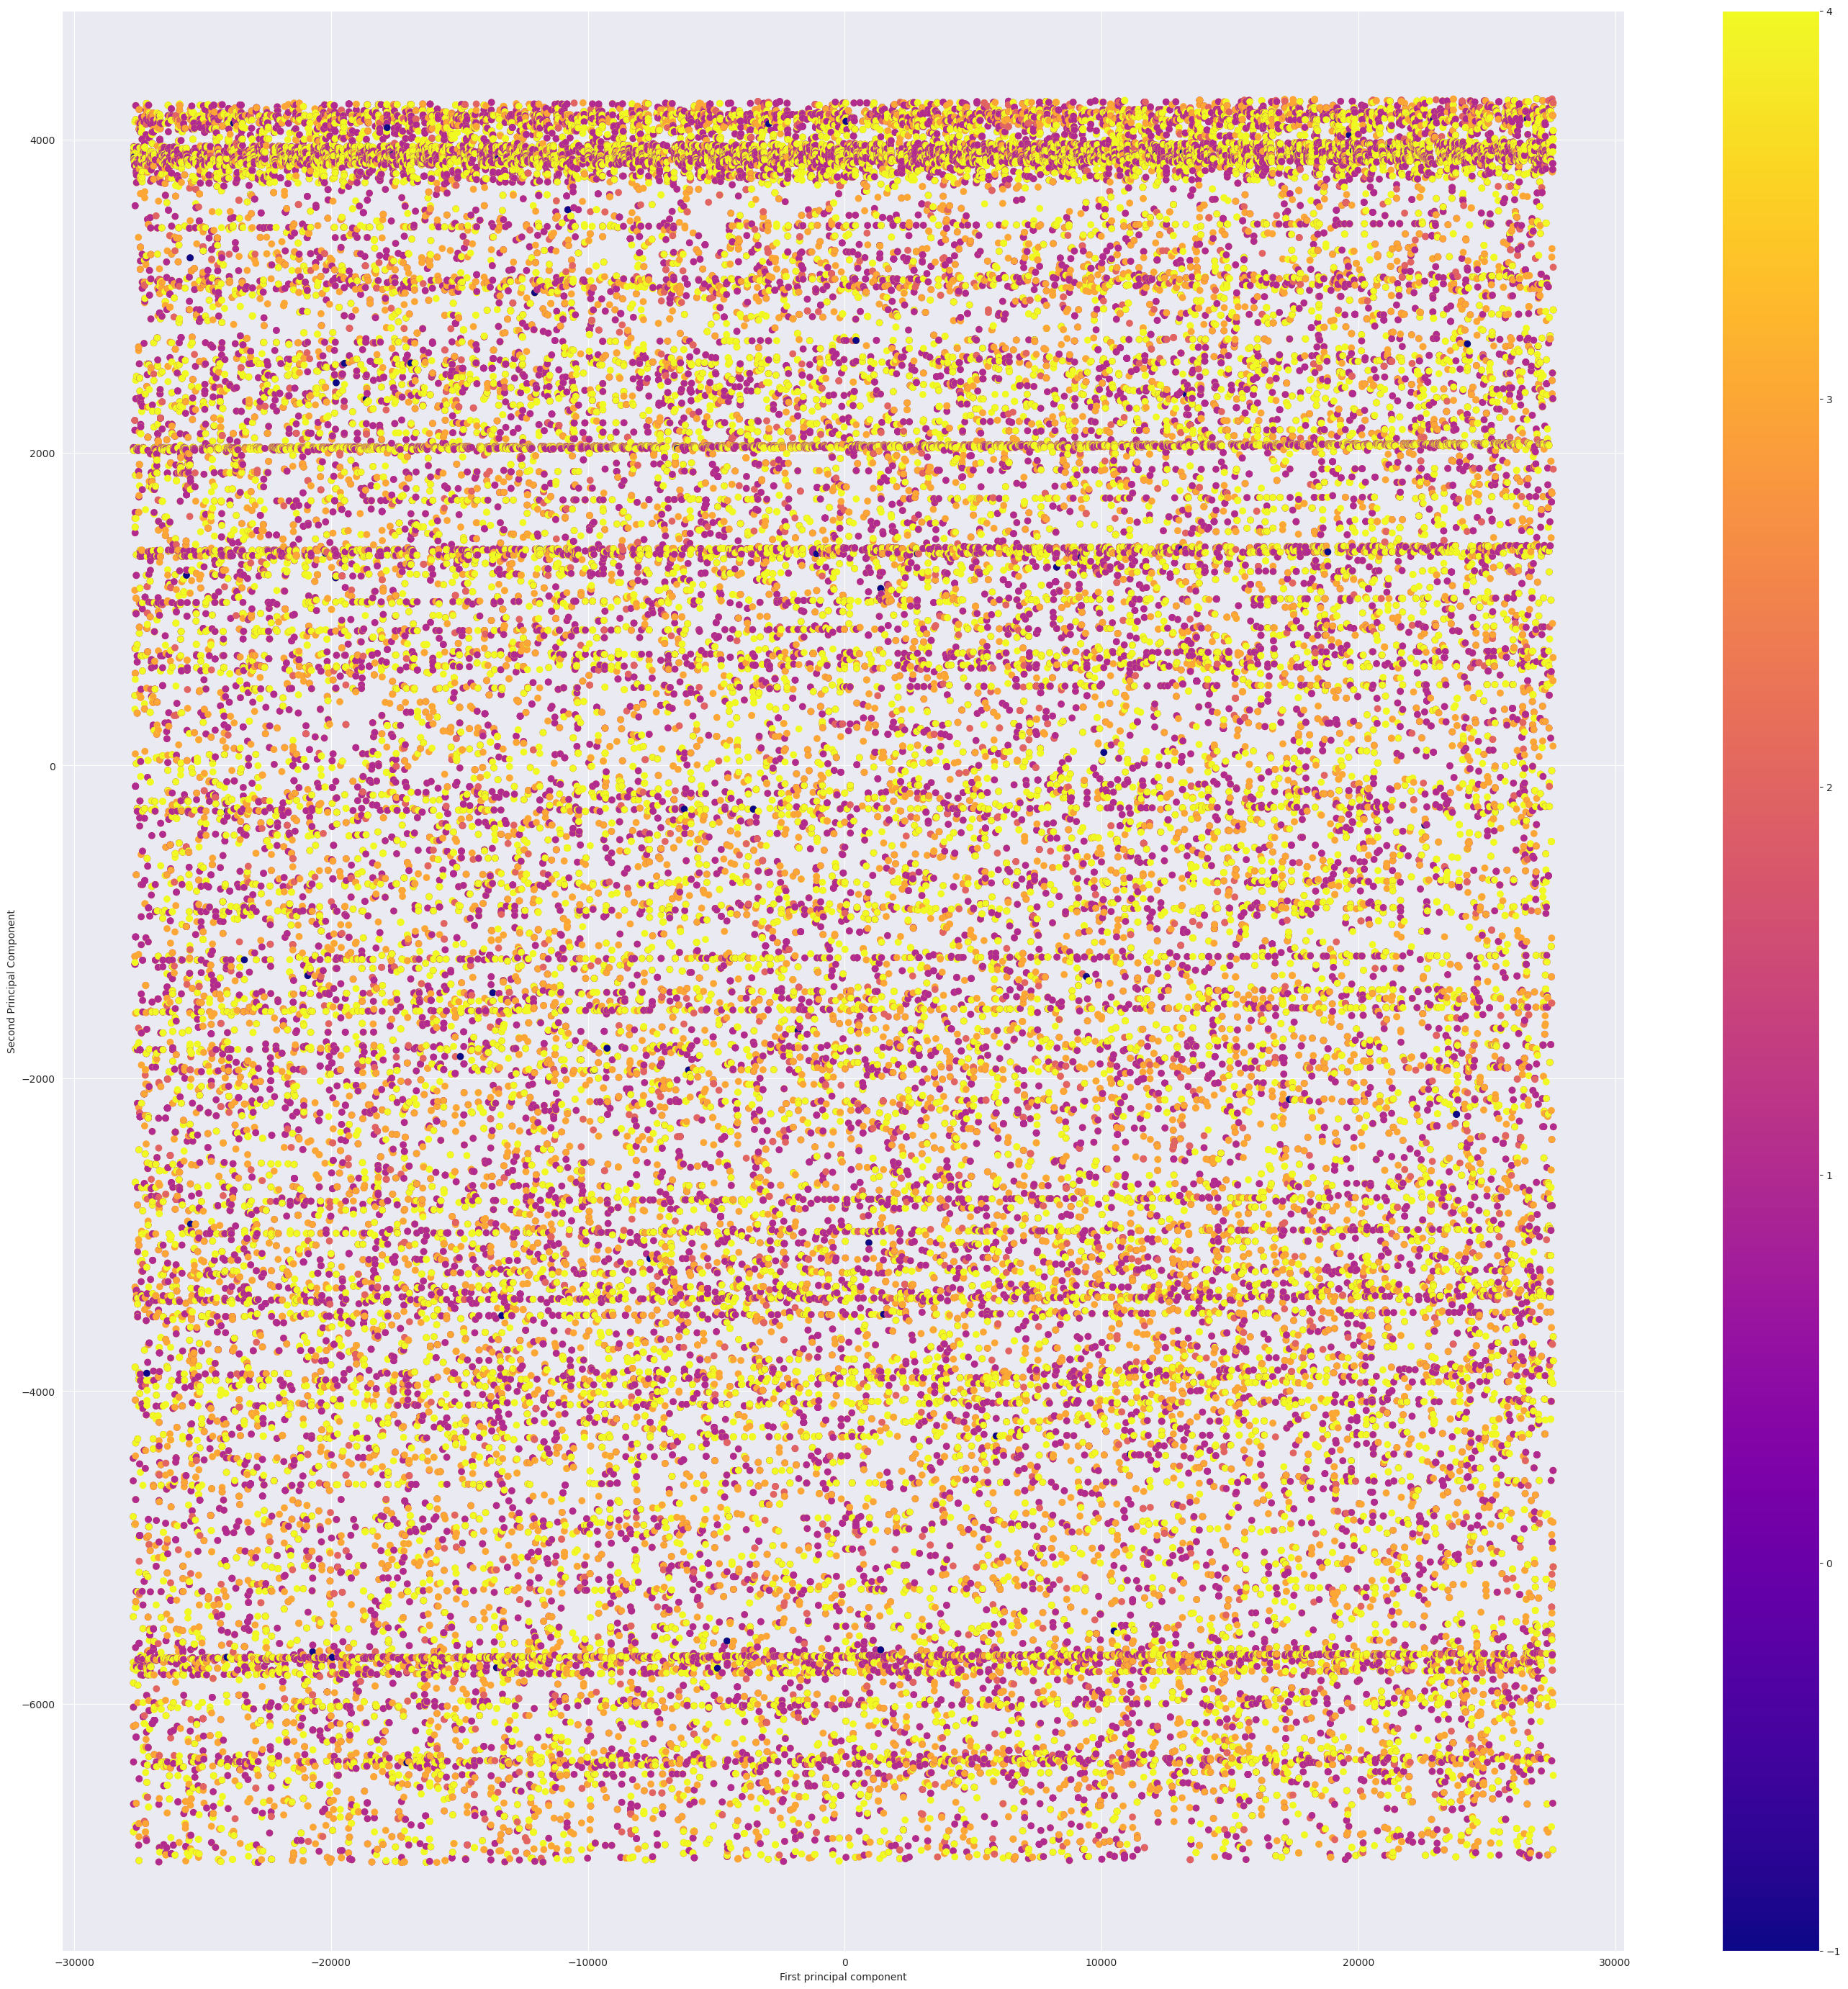

In [86]:
plt.figure(figsize=(35,35))
plt.scatter(x_train[:,0],x_train[:,1],c=testtruc["grav"],cmap='plasma')
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')